### Teoretiska Frågor

1. Beskriv kort hur en relationsdatabas fungerar.
- En relationsdatabas är en typ av databas där datan är oganiserad i tabell-form bestående av många rader och kolumner. Det finns en tydlig relation mellan de olika tabellerna i en databas.
2. Vad menas med “CRUD”-flödet?
- CRUD är en akronym som står för Create, Read, Update och Delete. Create funktionen används för att lägga till nya rader i en tabell. Read används för att göra en query som läser ut data från en tabell. Update syftar till att uppdatera en gammal data i en tabell medan Delete funktionen används för att radera ut data från en existerande tabell.
3. Beskriv kort vad en “left join” och en “inner join” är. Varför använder man det?
- En "left join" och en “inner join” används för att göra en koppling mellan olika tabeller i en databas. En "left join" används främst för att få fram all data från en tabell som man angett som den vänstra tabellen medan "inner join" används för att få fram data som är gemensam för båda tabellerna som man jobbar med i en viss query.
4. Beskriv kort vad indexering i SQL innebär.
- Indexering är en metod som används för att leta upp data eller matchande result en tabell som uppfyller vissa kreterier på ett snabbare sätt.
5. Beskriv kort vad en vy i SQL är.
- En vy är en tabell som man själv skapar för ett specifikt ändamål med hjälp av en query som man ställer till databasen.
6. Beskriv kort vad en lagrad procedur i SQL är.
- En lagrad procedur är precis som namnet antyder, en sparad kod som går att återanvändas flera gånger. Dess syfte är att underlätta användningen av en kod men också för att behålla konsistenta resultat i de fall koden används av flera individer.

In [96]:
! pip install sqlalchemy
! pip install pyodbc

In [285]:
from sqlalchemy import create_engine, URL, inspect
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [98]:
SERVER = 'localhost'
DATABASE = 'AdventureWorks2022'

connection_string = f'DRIVER={{ODBC Driver 18 for SQL Server}};SERVER={SERVER};DATABASE={DATABASE};Trusted_Connection=yes;Encrypt=no'

connection_url =URL.create('mssql+pyodbc', query={'odbc_connect': connection_string})

engine = create_engine(connection_url)

In [99]:
print(type(engine))

<class 'sqlalchemy.engine.base.Engine'>


In [100]:
connection = engine.connect()
print(type(connection))

<class 'sqlalchemy.engine.base.Connection'>


In [101]:
inspector = inspect(engine)
schemas = inspector.get_schema_names()
for schema in schemas:
    print(schema)

db_accessadmin
db_backupoperator
db_datareader
db_datawriter
db_ddladmin
db_denydatareader
db_denydatawriter
db_owner
db_securityadmin
dbo
guest
HumanResources
INFORMATION_SCHEMA
Person
Production
Purchasing
Sales
sys


In [102]:
schemas = inspector.get_table_names(schema='HumanResources')
for schema in schemas:
    print(schema)

Department
Employee
EmployeeDepartmentHistory
EmployeePayHistory
JobCandidate
Shift


In [103]:
for col in inspector.get_columns(table_name='Employee', schema='HumanResources'):
    print(col['name'])

BusinessEntityID
NationalIDNumber
LoginID
OrganizationNode
OrganizationLevel
JobTitle
BirthDate
MaritalStatus
Gender
HireDate
SalariedFlag
VacationHours
SickLeaveHours
CurrentFlag
rowguid
ModifiedDate


C:\Users\abdel\AppData\Local\Temp\ipykernel_3188\1145237355.py:1: SAWarning: Did not recognize type 'hierarchyid' of column 'OrganizationNode'
  for col in inspector.get_columns(table_name='Employee', schema='HumanResources'):


In [104]:
df = pd.read_sql(sql="SELECT * from Sales.SalesPerson", con=connection)
df.head()

,BusinessEntityID,TerritoryID,SalesQuota,Bonus,CommissionPct,SalesYTD,SalesLastYear,rowguid,ModifiedDate
0,274,NaN,NaN,0.0,0.000,5.596976e+05,0.000000e+00,48754992-9EE0-4C0E-8C94-9451604E3E02,2010-12-28
1,275,2.0,300000.0,4100.0,0.012,3.763178e+06,1.750406e+06,1E0A7274-3064-4F58-88EE-4C6586C87169,2011-05-24
2,276,4.0,250000.0,2000.0,0.015,4.251369e+06,1.439156e+06,4DD9EEE4-8E81-4F8C-AF97-683394C1F7C0,2011-05-24
3,277,3.0,250000.0,2500.0,0.015,3.189418e+06,1.997186e+06,39012928-BFEC-4242-874D-423162C3F567,2011-05-24
4,278,6.0,250000.0,500.0,0.010,1.453719e+06,1.620277e+06,7A0AE1AB-B283-40F9-91D1-167ABF06D720,2011-05-24


In [206]:
multijoin_sql = """
SELECT 
  A.CustomerID, 
  D.Name AS ProductName,
  C.ProductID,
  COUNT(*) AS PurchaseCount
FROM Sales.Customer AS A
INNER JOIN Sales.SalesOrderHeader AS B 
    ON A.CustomerID = B.CustomerID
INNER JOIN Sales.SalesOrderDetail AS C 
    ON B.SalesOrderID = C.SalesOrderID
INNER JOIN Production.Product AS D
    ON C.ProductID = D.ProductID
WHERE C.ProductID = '873'
GROUP BY A.CustomerID, D.Name, C.ProductID
ORDER BY PurchaseCount DESC;
"""
join_df = pd.read_sql(sql=multijoin_sql, con=connection)
join_df.head(12)

,CustomerID,ProductName,ProductID,PurchaseCount
0,11091,Patch Kit/8 Patches,873,10
1,11331,Patch Kit/8 Patches,873,10
2,11262,Patch Kit/8 Patches,873,9
3,11176,Patch Kit/8 Patches,873,9
4,11287,Patch Kit/8 Patches,873,8
5,11566,Patch Kit/8 Patches,873,8
6,11276,Patch Kit/8 Patches,873,7
7,11203,Patch Kit/8 Patches,873,7
8,11185,Patch Kit/8 Patches,873,7
9,11277,Patch Kit/8 Patches,873,6


# 
I tabellen ovan ser vi vilka kunder som har beställt en viss produkt med namnet (Patch Kit/8 Patches) och ProductID (873) mest. Med denna query har jag kunnat lista ut topp 12 kunder som har beställt produkten mest. Exempelvis har vi kunder med CustomerID (11091) och (11331) som ligger på topp i antalet ordrar av produkten med 10 beställningar var. 

In [215]:
# De 10 topp anställda som har sålt mest sen början av kalenderåret (SalesYTD).
SalesEmployee_query = """ 
SELECT 
  A.FirstName,
  A.LastName,
  B.BusinessEntityID,
  B.SalesYTD
FROM Sales.SalesPerson AS B
JOIN Person.Person AS A ON B.BusinessEntityID = A.BusinessEntityID
ORDER BY SalesYTD DESC;
 """
join_df = pd.read_sql(sql=SalesEmployee_query, con=connection)
join_df.head(10)

,FirstName,LastName,BusinessEntityID,SalesYTD
0,Linda,Mitchell,276,4.251369e+06
1,Jae,Pak,289,4.116871e+06
2,Michael,Blythe,275,3.763178e+06
3,Jillian,Carson,277,3.189418e+06
4,Ranjit,Varkey Chudukatil,290,3.121616e+06
5,José,Saraiva,282,2.604541e+06
6,Shu,Ito,281,2.458536e+06
7,Tsvi,Reiter,279,2.315186e+06
8,Rachel,Valdez,288,1.827067e+06
9,Tete,Mensa-Annan,284,1.576562e+06


In [107]:
# 
join_sql = """ 
SELECT 
  A.BusinessEntityID,
  B.FirstName,
  B.LastName,
  A.JobTitle,
  A.Gender,
  A.BirthDate
FROM HumanResources.Employee AS A
JOIN Person.Person AS B ON A.BusinessEntityID = B.BusinessEntityID
Order by BirthDate DESC
 """
join_df = pd.read_sql(sql=join_sql, con=connection)
join_df.head()

,BusinessEntityID,FirstName,LastName,JobTitle,Gender,BirthDate
0,115,Angela,Barbariol,Production Technician - WC50,F,1991-05-31
1,69,Steve,Masters,Production Technician - WC60,M,1991-04-06
2,133,Michael,Rothkugel,Production Technician - WC40,M,1991-01-04
3,144,Paul,Singh,Production Technician - WC20,M,1990-11-04
4,209,Kathie,Flood,Production Technician - WC45,F,1990-11-01


In [216]:
# Top 10 mest sålda produkter
SoldProducts_query = """
SELECT 
 A.Name AS ProductName,
 A.ProductID,
 SUM(OrderQty) AS TotalQuantitySold
FROM Sales.SalesOrderDetail AS B
JOIN 
 Production.Product AS A ON B.ProductID = A.ProductID
GROUP BY A.ProductID, A.Name
ORDER BY TotalQuantitySold DESC
 """
join_df = pd.read_sql(sql = SoldProducts_query, con=connection)
join_df.head(12)

,ProductName,ProductID,TotalQuantitySold
0,AWC Logo Cap,712,8311
1,Water Bottle - 30 oz.,870,6815
2,"Sport-100 Helmet, Blue",711,6743
3,"Long-Sleeve Logo Jersey, L",715,6592
4,"Sport-100 Helmet, Black",708,6532
5,"Sport-100 Helmet, Red",707,6266
6,"Classic Vest, S",864,4247
7,Patch Kit/8 Patches,873,3865
8,"Short-Sleeve Classic Jersey, XL",884,3864
9,"Long-Sleeve Logo Jersey, M",714,3636


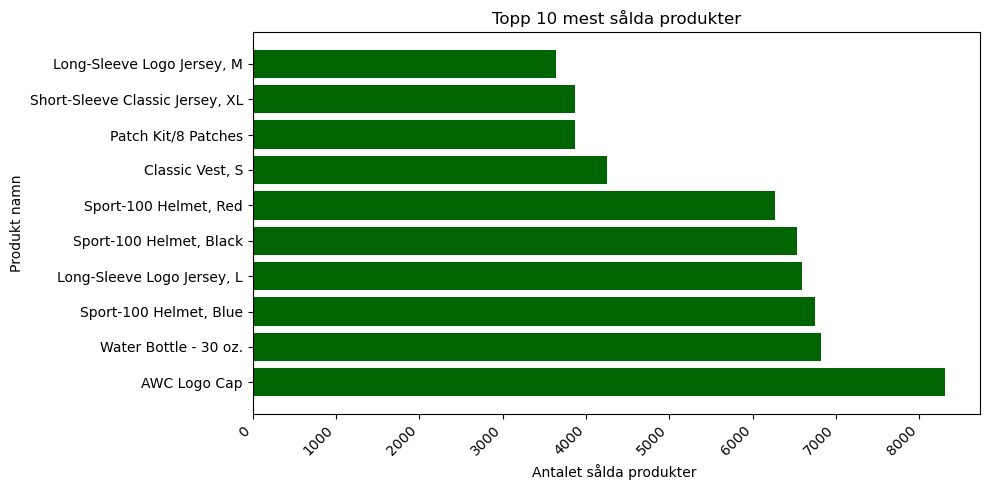

In [109]:
top_products = join_df.sort_values(by='TotalQuantitySold', ascending=False).head(10)
x = top_products['ProductName']
y = top_products['TotalQuantitySold']

plt.figure(figsize=(10, 5))
plt.barh(x, y, color='darkgreen')
plt.xlabel("Antalet sålda produkter ")
plt.ylabel("Produkt namn")
plt.title("Topp 10 mest sålda produkter")
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


In [214]:
SalesCustomer_query = """
SELECT  * 
FROM 
Sales.Customer
"""
join_df = pd.read_sql(sql = SalesCustomer_query, con=connection)
join_df.head(5)

,CustomerID,PersonID,StoreID,TerritoryID,AccountNumber,rowguid,ModifiedDate
0,1,NaN,934.0,1,AW00000001,3F5AE95E-B87D-4AED-95B4-C3797AFCB74F,2014-09-12 11:15:07.263
1,2,NaN,1028.0,1,AW00000002,E552F657-A9AF-4A7D-A645-C429D6E02491,2014-09-12 11:15:07.263
2,3,NaN,642.0,4,AW00000003,130774B1-DB21-4EF3-98C8-C104BCD6ED6D,2014-09-12 11:15:07.263
3,4,NaN,932.0,4,AW00000004,FF862851-1DAA-4044-BE7C-3E85583C054D,2014-09-12 11:15:07.263
4,5,NaN,1026.0,4,AW00000005,83905BDC-6F5E-4F71-B162-C98DA069F38A,2014-09-12 11:15:07.263


In [213]:
# Jämförelse av kundernas genomsnittliga köpbelopp mellan USA och Frankrike.
AvgPurchase_query = """
SELECT sp.CountryRegionCode AS Country, 
AVG(soh.TotalDue) AS AveragePurchaseAmount
FROM Sales.SalesOrderHeader soh
JOIN Sales.Customer c ON soh.CustomerID = c.CustomerID
JOIN Person.Address a ON c.PersonID = a.AddressID
JOIN Person.StateProvince sp ON a.StateProvinceID = sp.StateProvinceID
WHERE sp.CountryRegionCode = 'US' OR sp.CountryRegionCode = 'FR'
GROUP BY sp.CountryRegionCode 
ORDER BY AveragePurchaseAmount DESC
"""
df = pd.read_sql(sql = AvgPurchase_query, con=connection)
df.head()

,Country,AveragePurchaseAmount
0,US,5949.0527
1,FR,1862.9284


In [221]:
# Den årliga försäljningstrenden i den Amerikanska marknaden mellan 2011 och 2014.
Trend_query = """
SELECT 
    Year(soh.OrderDate) AS Year, 
    SUM(soh.TotalDue) AS TotalSales,
	sp.CountryRegionCode
FROM Sales.SalesOrderHeader soh
INNER JOIN Person.Address a 
    ON soh.BillToAddressID = a.AddressID
INNER JOIN Person.StateProvince sp
    ON a.StateProvinceID = sp.StateProvinceID
WHERE sp.CountryRegionCode = 'US'
GROUP BY Year(soh.OrderDate), sp.CountryRegionCode
ORDER BY Year;
"""
data = pd.read_sql(sql = Trend_query, con=connection)
data.head()

,Year,TotalSales,CountryRegionCode
0,2011,9.445719e+06,US
1,2012,2.460676e+07,US
2,2013,2.604434e+07,US
3,2014,1.073304e+07,US


In [284]:
mean = data['TotalSales'].mean()
std_dev = data['TotalSales'].std(ddof=0)

print(f"Populations medelvärde: {mean}")
print(f"Populations standardavvikelse: {std_dev}")


Populations medelvärde: 17707465.80075
Populations standardavvikelse: 7648575.778664195


In [283]:
# 95% signifikansnivån.

z_värde = 1.96 
mean = data['TotalSales'].mean()
std_dev = data['TotalSales'].std(ddof=0)
n = 4

nedre_intervall = mean - z_värde * (std_dev / math.sqrt(n))
övre_intervall = mean + z_värde * (std_dev / math.sqrt(n))

print(f"Konfidensintervallet ligger mellan: [{nedre_intervall} och {övre_intervall}]")



Konfidensintervallet ligger mellan: [10211861.537659086 och 25203070.06384091]


Resultatet ovan visar att konfidensintervallet ligger mellan 10 211 862 och 25 203 070. Eftersom vårt medelvärde (17 707 465) ligger inom intervallet innebär det att det inte finns någon signifikant skillnad i försäljningstrenden i USA och därmed kan vi inte förkasta nollhypotesen. 

In [286]:
#Kommer eventuellt behöva ändras
slope, intercept, r_value, p_value, std_err = linregress(data['Year'], data['TotalSales'])

sig_level = 0.05 

print(f"Slope: {slope}")
print(f"P-value: {p_value}")
if p_value < sig_level:
    print(f"The trend is statistically significant at the {sig_level * 100}% significance level.")
else:
    print(f"The trend is not statistically significant at the {sig_level * 100}% significance level.")

Slope: 529954.9164000001
P-value: 0.9225336028319001
The trend is not statistically significant at the 5.0% significance level.
